<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Estudio de Caso 1  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="green"> **Objetivo del estudio de caso y resultados de aprendizaje** </FONT>

En este estudio de caso se espera que el estudiante aplique los conceptos vistos en la primera parte del curso. Particularmente.

- Cargar y explorar datos estructurados que incluyen cadenas de texto.

- Aplicar las técnicas de limpieza para normalizar un texto.

- Reconocer los elementos de la creación de una bolsa de palabras por vectorización con frecuencias y con **TF-iDF**.

- Aplicar Naive-Bayes para problemas de clasificación y comparar los resultados de NB con otros algoritmos.

- Aplicar lo anterior para hacer análisis de sentimientos.

# <FONT SIZE=5 COLOR="green"> **Indicaciones** </FONT>

- Para entregar en grupos de máximo tres integrantes.

- Cargar en la plataforma *e-aulas* los archivos: *.ipynb* y *.pdf*

- Fecha de entrega el día **jueves 31 de julio antes de las 6:00 p.m.**

### Carga de Librerias Necesarias

In [1]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=d1b369f1828cfcf9d43ad9287e4037855be4d7ecc261b5549046798759abe644
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [118]:
#
import pandas as pd
import re
import nltk
from stop_words import get_stop_words
import pickle

#
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Utilizar 'notebook' para html o 'colab'
import plotly.io as pio
pio.renderers.default='colab'

#
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [3]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# <FONT SIZE=5 COLOR="bronw"> **Punto 1. Carga y Exploración de los datos** </FONT>

Considere la siguiente base donde se reportan comentarios en Twitter de productos de Apple.

"https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"

1. Cargue los datos y haga una breve descripción de estos. Cambie el nombre de las columnas por otros más cortos.

In [4]:
url="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"
datos=pd.read_csv(url)
datos = datos.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"product","is_there_an_emotion_directed_at_a_brand_or_product":"emotion"})
datos.head()

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**_Insetar texto epicardo descriptivo de los datos_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.


2. En la columna de *emotions* agrupe solamente en tres categorias: *positivos*, *neutros* y *negativos*. Haga la tabla de frecuencias.

In [5]:
datos["emotion"] = datos["emotion"].replace({'No emotion toward brand or product':'neutral', 'I can\'t tell':'neutral','Negative emotion':'negative','Positive emotion':'positive'})

In [6]:
datos.head(1)

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative


In [7]:
datos["emotion"].value_counts()

neutral     5545
positive    2978
negative     570
Name: emotion, dtype: int64

3. ¿Cuál es el top 5 de los usuarios (@) y de los hashtag (#)?
### Usuarios top 5

In [8]:
# Encontrar los usuarios en un tweet
patron_1 = r'(@\w{2,})'
list_user = []

for i in range(len(datos)):
  if datos.tweet[i] == None:
    continue
  elif not isinstance(datos.tweet[i], str):
        continue
  elif re.findall(patron_1, datos.tweet[i]) == ['']:
    continue
  else:
    list_user.append(re.findall(patron_1, datos.tweet[i]))

In [9]:
# Aplanamos la lista de usuarios
list_user_f = []
for i in list_user:
  list_user_f += i

# Obtenemos las frecuencias de la repetición de usuarios
freq_user =nltk.FreqDist(list_user_f)

In [10]:
df_user = pd.DataFrame([[key, freq_user[key]] for key in freq_user.keys()], columns=['Palabra', 'Frecuencia'])
df_top_user = df_user.sort_values("Frecuencia", ascending=False)

In [11]:
df_top_user.head(5)

,Palabra,Frecuencia
23,@mention,7110
7,@madebymany,5
44,@Schmittastic,3
24,@garyvee,3
27,@mentionc,2


**_Insetar texto epicardo de análisis de la tabla_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.

### Hashtag

In [12]:
# Encontrar los hashtags en un tweet

patron_2 = r'(#\w{2,})'
list_topic = []

for i in range(len(datos)):
  if datos.tweet[i] == None:
    continue
  elif not isinstance(datos.tweet[i], str):
        continue
  elif re.findall(patron_2, datos.tweet[i]) == ['']:
    continue
  else:
    list_topic.append(re.findall(patron_2, datos.tweet[i]))

In [13]:
# Aplanamos la lista de topics
list_topic_f = []
for i in list_topic:
  list_topic_f += i

# Obtenemos las frecuencias de la repetición de topics
freq_topic =nltk.FreqDist(list_topic_f)

In [14]:
# Obtenemos la tabla de frecuencias del top 10 de topics
df_user = pd.DataFrame([[key, freq_topic[key]] for key in freq_topic.keys()], columns=['Palabra', 'Frecuencia'])
df_top_user = df_user.sort_values("Frecuencia", ascending=False)
df_top_user.head(5)

,Palabra,Frecuencia
3,#sxsw,4544
1,#SXSW,4375
47,#Apple,245
13,#iPhone,215
38,#sxswi,209


**_Insetar texto epicardo de análisis de la tabla_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.


4. Haga una nube de palabras con los hashtag.

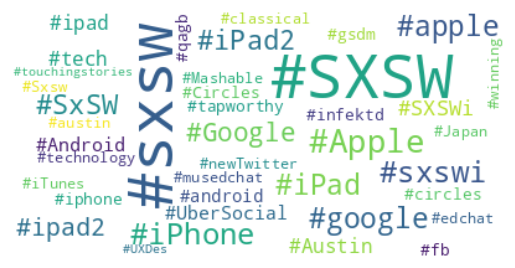

In [110]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=40,
                      background_color="white",
                      colormap = "viridis").generate_from_frequencies(freq_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**_Insetar texto epicardo de análisis de la nube_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.


5. Realice un gráfico de barras de la variable: producto evaluado (columna 2). Analice.

In [16]:
px.bar(datos["product"].value_counts(),title="Recuento de la cantidad del producto")

**_Insetar texto epicardo de análisis de la gráfica_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.


6. ¿Cuál producto tiene más comentarios positivos? ¿negativos?

In [17]:
product_counts = datos["product"].value_counts()

# Crear una lista para almacenar los datos de cada emoción
data_list = []

# Iterar a través de cada producto y agregar los recuentos de emociones a data_list
for product in product_counts.index:
    emotion_counts = datos[datos["product"] == product]["emotion"].value_counts()
    for emotion, count in emotion_counts.items():
        data_list.append({"product": product, "emotion": emotion, "count": count})

# Crear un DataFrame a partir de la lista de datos
data_df = pd.DataFrame(data_list)

# Crear el gráfico de barras agrupado por producto y emoción
fig = px.bar(data_df, x="product", y="count", color="emotion", title="Recuentos de Emociones por Producto")

fig.show()

**El iPad, _Insetar texto epicardo de análisis de la gráfica_**



Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla enim purus, mollis imperdiet orci nec, volutpat elementum magna. Integer pellentesque gravida orci, non efficitur metus. Integer ac massa vel elit lobortis sodales vulputate id ante. Fusce vestibulum, nulla at sagittis varius, arcu diam viverra neque, nec aliquet ex tortor at dui. Sed pellentesque pulvinar lacus, sed posuere quam venenatis eget. Sed ipsum sapien, condimentum in tellus eget, euismod scelerisque enim. Donec ut diam nec augue venenatis placerat et id mauris. In dignissim dapibus elit ultrices posuere. Quisque sed porttitor justo. Pellentesque vitae pharetra quam, sed ultricies velit. Morbi elementum sem vel purus aliquet, ut facilisis magna gravida. Etiam lobortis ultricies sem hendrerit mollis. Donec a pretium quam. Ut sed turpis sed dolor fringilla facilisis nec et ante. In eget venenatis risus, vel varius risus. Curabitur sed feugiat mi.

# <FONT SIZE=5 COLOR="bronw"> **Punto 2. Normalización** </FONT>

Aplique los conceptos de normalización vistos en clase para hacer la limpieza de los datos. Por ejemplo,

- Preprocesamiento de los datos
- Pasar a minúscula
- Eliminar algunos signos, quitar los *@* y *#*.
- Eliminar stop words, etc.

Recuerde que la normalización no es estándar y depende del contexto de los datos y queda a discreción de la persona que analiza la información.

- Guarde el procesamiento en un archivo ***.pickle***. Despues, puede importar este archivo y evita que tenga que volver a ejecutar el procesamiento, lo cual ahorra tiempo. (trabajo de consulta cómo hacerlo)

In [18]:
def cleanPLN(texto, idioma = "es"):
  # Pasar a minusculas
  texto = texto.lower()
  # Remover caracteres especiales y tildes
  texto = re.sub(r'[á]+', 'a', texto)
  texto = re.sub(r'[é]+', 'e', texto)
  texto = re.sub(r'[í]+', 'i', texto)
  texto = re.sub(r'[ó]+', 'o', texto)
  texto = re.sub(r'[úü]+', 'u', texto)
  texto = re.sub(r'[^A-Za-z\s]+', '', texto)
  texto = texto.replace('@', '').replace('#', '')
  # Tokenizar
  tokens = nltk.word_tokenize(texto)
  # Eliminar las stop.words y Dejar palabras con más de 3 caracteres
  stop_words=get_stop_words(idioma)
  tokens_clean = [palabras for palabras in tokens if len(palabras)>3 and (palabras not in stop_words)]
  # Regrese la cadena de texto simplificada.
  texto_limpio = ' '.join(tokens_clean)
  return texto_limpio

In [19]:
datos.head(1)

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative


In [20]:
datos['tweet'] = datos['tweet'].astype(str)
datos['tweet'] = datos['tweet'].apply(lambda x: cleanPLN(x,"en"))

In [21]:
with open('datos_limpios.pickle', 'wb') as f:
    pickle.dump(datos, f)

In [22]:
with open('datos_limpios.pickle', 'rb') as f:
    datos_normalizados = pickle.load(f)

In [23]:
datos_normalizados.head()

,tweet,product,emotion
0,wesley iphone tweeting riseaustin dead need up...,iPhone,negative
1,jessedee know fludapp awesome ipadiphone youll...,iPad or iPhone App,positive
2,swonderlin wait ipad also sale sxsw,iPad,positive
3,sxsw hope years festival isnt crashy years iph...,iPad or iPhone App,negative
4,sxtxstate great stuff sxsw marissa mayer googl...,Google,positive


# <FONT SIZE=5 COLOR="bronw"> **Punto 3. Modelos de Machine Learning** </FONT>

Aplicar los siguientes modelos de ML teniendo en cuenta

a) **vectorización con frecuencias**. CountVectorizer

b) **TF-iDF**. Tf+idfVectorizer

Para este último tener el cuenta las 1000 palabras más frecuentes y las palabras que aparezcan mínimo en 3 documentos.

Con cada uno de las vectorizaciones aplicar los siguientes modelos
  
  - Naive Bayes: Bernoulli

  - Naive Bayes: Multinomial

  - Regresión logística

  - Otro método de libre elección por el estudiante

Guarde el entrenamiento de los modelos en archivos ***.pickle***.

Para poder utilizar los modelos y predecir valores categóricos, es necesario convertir la variable objetivo en variables numericas mediante la técnica de "Label Encoding". En este caso, se ajusta un codificador a los valores únicos de una columna de un marco de datos, y luego se transforma la columna con el codificador para asignar un valor numérico único a cada etiqueta.


In [24]:
# Convertir las emociones en variables numéricas
le = LabelEncoder()
le.fit(datos['emotion'])

datos['emotion'] = le.transform(datos['emotion'])
datos.head()

,tweet,product,emotion
0,wesley iphone tweeting riseaustin dead need up...,iPhone,0
1,jessedee know fludapp awesome ipadiphone youll...,iPad or iPhone App,2
2,swonderlin wait ipad also sale sxsw,iPad,2
3,sxsw hope years festival isnt crashy years iph...,iPad or iPhone App,0
4,sxtxstate great stuff sxsw marissa mayer googl...,Google,2


In [25]:
# Dividir los datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(datos[['tweet']],
                                                    datos[['emotion']],
                                                    random_state=0)
print('Número de filas total base: {}'.format(datos.shape[0]))
print('Número de filas conjunto de entrenamiento: {}'.format(X_train.shape[0]))
print('Número de filas conjunto de prueba: {}'.format(X_test.shape[0]))

Número de filas total base: 9093
Número de filas conjunto de entrenamiento: 6819
Número de filas conjunto de prueba: 2274


In [26]:
# Definir las vectorizaciones
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=3)

In [27]:
# Aplicar las vectorizaciones a los datos de entrenamiento
X_train_count = count_vectorizer.fit_transform(X_train['tweet'])
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['tweet'])

# Aplicar las vectorizaciones a los datos de prueba
X_test_count = count_vectorizer.transform(X_test['tweet'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['tweet'])

In [28]:
# Guardar los vectorizadores en un archivo pickle
with open('vectorizers.pickle', 'wb') as f:
    pickle.dump((count_vectorizer, tfidf_vectorizer), f)

In [29]:
# Definir los modelos de clasificación
models = {
    "Bernoulli-Naive-Bayes": BernoulliNB(),
    "Multinomial-Naive-Bayes": MultinomialNB(),
    "Logistic-Regression": LogisticRegression(max_iter=1000),
    "Neural-Network": MLPClassifier(max_iter=1000)
}

In [30]:
# Entrenar CountVectorizer con los modelos y guardarlo en un .pickle
for model_name, model in models.items():
  # Entrenar el modelo
  model.fit(X_train_count, y_train)
  # Guardar el modelo en un archivo pickle
  filename = f"CountVectorizer_{model_name}.pickle"
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [31]:
# Entrenar TfidfVectorizer con los modelos y guardarlo en un .pickle
for model_name, model in models.items():
  # Entrenar el modelo
  model.fit(X_train_tfidf, y_train)
  # Guardar el modelo en un archivo pickle
  filename = f"TfidfVectorizer_{model_name}.pickle"
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# <FONT SIZE=5 COLOR="bronw"> **Punto 4. Evaluación y comparación de los Modelos** </FONT>

En este punto se evaluarán los modelos entrenados en el punto anterior.

1. Hacer las matrices de confusión de cada uno de los modelos.

2. Hacer una tabla de resumen de las métricas de los modelos. Una con la vectorización por frecuencia y otra con **TF-iDF**. La tabla debe contener en filas los métodos aplicados y en columnas las métricas así:
*accuracy_train* | *accuracy_test* | *recall_train*| *recall_test*|f1_train|f1_test|

3. Hacer gráficos de barras: uno por cada métrica, en filas los algoritmos aplicados y en la altura la comparación del valor en *train* y *test*.

4. Genere un par de tweets y clasifíquelos usando el mejor modelo encontrado.  

### Evaluación de Modelos

In [67]:
# Carga de Modelos
count_files = [
    "CountVectorizer_Bernoulli-Naive-Bayes.pickle",
    "CountVectorizer_Multinomial-Naive-Bayes.pickle",
    "CountVectorizer_Logistic-Regression.pickle",
    "CountVectorizer_Neural-Network.pickle"
]
tfidf_files = [
    "TfidfVectorizer_Bernoulli-Naive-Bayes.pickle",
    "TfidfVectorizer_Multinomial-Naive-Bayes.pickle",
    "TfidfVectorizer_Logistic-Regression.pickle",
    "TfidfVectorizer_Neural-Network.pickle"
]

In [35]:
# Definir las métricas a calcular
metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'f1': f1_score
}

*Posiblemente se debe de reescribir la variables de X_train, pues son las que generan los errores*

In [85]:
# Inicializar los resultados
results_list = []

In [86]:
# Evaluar cada modelo para CountVectorizer
for model_name in count_files:
  with open(model_name, 'rb') as f:
    model = pickle.load(f)
  # Predecir etiquetas
  y_train_pred = model.predict(X_train_count)
  y_test_pred = model.predict(X_test_count)
  # Calcular métricas
  train_metrics_values = [
      accuracy_score(y_train, y_train_pred),
      recall_score(y_train, y_train_pred, average='weighted'),
      f1_score(y_train, y_train_pred, average='weighted')
  ]
  test_metrics_values = [
      accuracy_score(y_test, y_test_pred),
      recall_score(y_test, y_test_pred, average='weighted'),
      f1_score(y_test, y_test_pred, average='weighted')
  ]
  print(f"{model_name} \n Train \n{train_metrics_values} \n Test\n{test_metrics_values} \n Pred Values \n{y_test_pred}")
  # Agregar resultados a la lista
  results_list.append(["CountVectorizer", model_name] + train_metrics_values + test_metrics_values)

CountVectorizer_Bernoulli-Naive-Bayes.pickle 
 Train 
[0.7977709341545681, 0.7977709341545681, 0.7733582382525702] 
 Test
[0.6781002638522428, 0.6781002638522428, 0.6408472351842446] 
 Pred Values 
[1 2 1 ... 2 1 1]
CountVectorizer_Multinomial-Naive-Bayes.pickle 
 Train 
[0.8284205895292565, 0.8284205895292565, 0.822757845943109] 
 Test
[0.6750219876868954, 0.6750219876868954, 0.6551843741106359] 
 Pred Values 
[2 2 1 ... 2 0 2]
CountVectorizer_Logistic-Regression.pickle 
 Train 
[0.9030649655374688, 0.9030649655374688, 0.9015042289051991] 
 Test
[0.693051890941073, 0.693051890941073, 0.6782784114531248] 
 Pred Values 
[2 2 1 ... 2 1 2]
CountVectorizer_Neural-Network.pickle 
 Train 
[0.9891479689103975, 0.9891479689103975, 0.9891463447818009] 
 Test
[0.6525945470536499, 0.6525945470536499, 0.6493304646648806] 
 Pred Values 
[2 2 1 ... 2 1 2]


In [87]:
# Evaluar cada modelo para TfidfVectorizer
for model_name in tfidf_files:
  with open(model_name, 'rb') as f:
    model = pickle.load(f)

  # Predecir etiquetas
  y_train_pred = model.predict(X_train_tfidf)
  y_test_pred = model.predict(X_test_tfidf)

  # Calcular métricas
  train_metrics_values = [
      accuracy_score(y_train, y_train_pred),
      recall_score(y_train, y_train_pred, average='weighted'),
      f1_score(y_train, y_train_pred, average='weighted')
  ]
  test_metrics_values = [
      accuracy_score(y_test, y_test_pred),
      recall_score(y_test, y_test_pred, average='weighted'),
      f1_score(y_test, y_test_pred, average='weighted')
  ]
  print(f"{model_name} \n Train \n{train_metrics_values} \n Test\n{test_metrics_values} \n Pred Values \n{y_test_pred}")
  # Agregar resultados a la lista
  results_list.append(["TfidfVectorizer", model_name] + train_metrics_values + test_metrics_values)

TfidfVectorizer_Bernoulli-Naive-Bayes.pickle 
 Train 
[0.7081683531309576, 0.7081683531309576, 0.7062865976628278] 
 Test
[0.6591908531222516, 0.6591908531222516, 0.6556370573153405] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Multinomial-Naive-Bayes.pickle 
 Train 
[0.7064085643056166, 0.7064085643056166, 0.6662805295792245] 
 Test
[0.6710642040457344, 0.6710642040457344, 0.6245754033078829] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Logistic-Regression.pickle 
 Train 
[0.7364716234051913, 0.7364716234051913, 0.711460641837822] 
 Test
[0.6811785400175902, 0.6811785400175902, 0.6531381838557452] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Neural-Network.pickle 
 Train 
[0.9769760962017892, 0.9769760962017892, 0.9769119887699448] 
 Test
[0.6517150395778364, 0.6517150395778364, 0.6467208446929072] 
 Pred Values 
[2 2 1 ... 2 2 2]


In [88]:
# Crear un DataFrame para los resultados
columns = ['Vectorization', 'Model'] + [f'{metric}_train' for metric in metrics.keys()] + [f'{metric}_test' for metric in metrics.keys()]
results = pd.DataFrame(results_list)
results = results.rename(columns=dict(zip(results.columns.tolist(), columns)))
results.head(8)

,Vectorization,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
0,CountVectorizer,CountVectorizer_Bernoulli-Naive-Bayes.pickle,0.797771,0.797771,0.773358,0.678100,0.678100,0.640847
1,CountVectorizer,CountVectorizer_Multinomial-Naive-Bayes.pickle,0.828421,0.828421,0.822758,0.675022,0.675022,0.655184
2,CountVectorizer,CountVectorizer_Logistic-Regression.pickle,0.903065,0.903065,0.901504,0.693052,0.693052,0.678278
3,CountVectorizer,CountVectorizer_Neural-Network.pickle,0.989148,0.989148,0.989146,0.652595,0.652595,0.649330
4,TfidfVectorizer,TfidfVectorizer_Bernoulli-Naive-Bayes.pickle,0.708168,0.708168,0.706287,0.659191,0.659191,0.655637
5,TfidfVectorizer,TfidfVectorizer_Multinomial-Naive-Bayes.pickle,0.706409,0.706409,0.666281,0.671064,0.671064,0.624575
6,TfidfVectorizer,TfidfVectorizer_Logistic-Regression.pickle,0.736472,0.736472,0.711461,0.681179,0.681179,0.653138
7,TfidfVectorizer,TfidfVectorizer_Neural-Network.pickle,0.976976,0.976976,0.976912,0.651715,0.651715,0.646721


### Matrices de Confusión

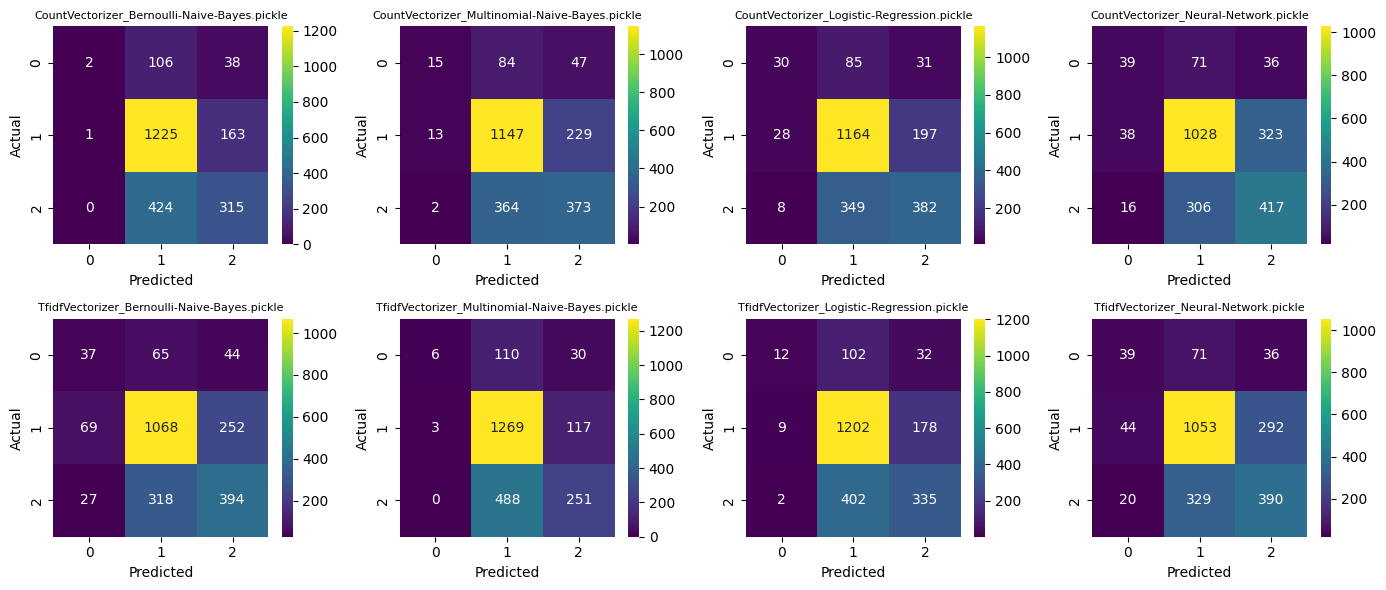

In [108]:
# Supongamos que tienes tu DataFrame 'results' y las variables X_test_count, X_test_tfidf, y_test definidas

# Código para iterar a través de los resultados y dibujar las gráficas
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
fig.subplots_adjust(hspace=0.4)

for i, row in results.iterrows():
    vec_name = row['Vectorization']
    model_file = row['Model']

    with open(model_file, 'rb') as f:
        model = pickle.load(f)
    if row["Vectorization"] == "CountVectorizer":
        y_pred = model.predict(X_test_count)
    else:
        y_pred = model.predict(X_test_tfidf)

    cm = confusion_matrix(y_test, y_pred)

    row_idx = i // 4  # Fila correspondiente en la cuadrícula
    col_idx = i % 4   # Columna correspondiente en la cuadrícula

    ax = axes[row_idx, col_idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax)
    ax.set_title(model_file, fontsize=8)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Tablas de resumen

Para CountVectorizer

In [109]:
results[results['Vectorization'] == 'CountVectorizer'].iloc[:, 1:]

,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
0,CountVectorizer_Bernoulli-Naive-Bayes.pickle,0.797771,0.797771,0.773358,0.678100,0.678100,0.640847
1,CountVectorizer_Multinomial-Naive-Bayes.pickle,0.828421,0.828421,0.822758,0.675022,0.675022,0.655184
2,CountVectorizer_Logistic-Regression.pickle,0.903065,0.903065,0.901504,0.693052,0.693052,0.678278
3,CountVectorizer_Neural-Network.pickle,0.989148,0.989148,0.989146,0.652595,0.652595,0.649330


Para TfidfVectorizer

In [90]:
results[results['Vectorization'] == 'TfidfVectorizer'].iloc[:, 1:]

,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
4,TfidfVectorizer_Bernoulli-Naive-Bayes.pickle,0.708168,0.708168,0.706287,0.659191,0.659191,0.655637
5,TfidfVectorizer_Multinomial-Naive-Bayes.pickle,0.706409,0.706409,0.666281,0.671064,0.671064,0.624575
6,TfidfVectorizer_Logistic-Regression.pickle,0.736472,0.736472,0.711461,0.681179,0.681179,0.653138
7,TfidfVectorizer_Neural-Network.pickle,0.976976,0.976976,0.976912,0.651715,0.651715,0.646721


### Gráficos de Barras

In [111]:
for metric in metrics:
    fig_train = px.bar(results, x='Model', y=f'{metric}_train', color='Vectorization', title=f'{metric.capitalize()} Comparison (Train)')
    #fig_train.update_xaxes(tickfont=dict(size=6))
    fig_train.show()

    fig_test = px.bar(results, x='Model', y=f'{metric}_test', color='Vectorization', title=f'{metric.capitalize()} Comparison (Test)')
    #fig_train.update_xaxes(tickfont=dict(size=6))
    fig_test.show()

### Pruebas con tweets

In [120]:
filas = 5
aleatorios = datos.sample(filas)
aleatorios.head(filas)

,tweet,product,emotion
116,sxsw apple schools marketing experts link,Apple,2
2625,iphone autocorrect already tried change quotco...,iPhone,0
8335,franken takes shot apple process mention strib...,NaN,1
7123,waiting sxsw session start touching stories de...,NaN,1
4577,mention ipad apps speech therapy communication...,NaN,1


In [121]:
aleatorios.reset_index(drop=True, inplace=True)
aleatorios.head(filas)

,tweet,product,emotion
0,sxsw apple schools marketing experts link,Apple,2
1,iphone autocorrect already tried change quotco...,iPhone,0
2,franken takes shot apple process mention strib...,NaN,1
3,waiting sxsw session start touching stories de...,NaN,1
4,mention ipad apps speech therapy communication...,NaN,1


In [122]:
# Cambiar por el nombre del mejor modelo
with open(count_files[2], 'rb') as f:
    best_model = pickle.load(f)

In [123]:
tweets_vectorized = count_vectorizer.transform(aleatorios['tweet'])

In [124]:
predictions = best_model.predict(tweets_vectorized)

In [125]:
for i in range(len(aleatorios)):
  print(f"Tweet: {aleatorios['tweet'][i]} \n Predicción: {predictions[i]} \t Real: {aleatorios['emotion'][i]}")

Tweet: sxsw apple schools marketing experts link 
 Predicción: 2 	 Real: 2
Tweet: iphone autocorrect already tried change quotcoworkersquot quotvisigothsquot going long five days sxsw 
 Predicción: 0 	 Real: 0
Tweet: franken takes shot apple process mention stribpol sxsw calls audience quotjob creatorsquot 
 Predicción: 1 	 Real: 1
Tweet: waiting sxsw session start touching stories designing digital magazines ipad 
 Predicción: 1 	 Real: 1
Tweet: mention ipad apps speech therapy communication showcased mention sxsw conference link sxswi sxswh edapps 
 Predicción: 1 	 Real: 1


# <FONT SIZE=5 COLOR="bronw"> **Punto 5. Conclusiones** </FONT>

Concluya sobre los resultados obtenidos en el punto 4.

Concluya sobre la actividad desarrollada.

# <FONT SIZE=5 COLOR="bronw"> **Punto 6. Bibliografía** </FONT>

Relacione algunas fuentes bibliográficas o de consulta, usadas para el desarrollo de este trabajo.